<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [47]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem, beta

import pylab as plt
import statsmodels.stats.api as sms
import scipy.stats as stats

import pylab as plt
import seaborn as sns



In [5]:
# datos
df = pd.read_csv('..\\6.4-lab_ab_testing\\data\\cookie_cats.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


AB TESTING BAYES

In [6]:
# muestreo

df.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
Name: count, dtype: int64

In [7]:
df.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
Name: count, dtype: int64

In [8]:
# testeo para retention_1
imps_ctrl, convs_ctrl = 44700, 20034   # entrar, comprar

imps_test, convs_test = 45489, 20119


CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

CR_ctrl, CR_test

(0.4481879194630872, 0.44228274967574577)

In [9]:

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [10]:
x=np.linspace(0.4, 0.5,1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

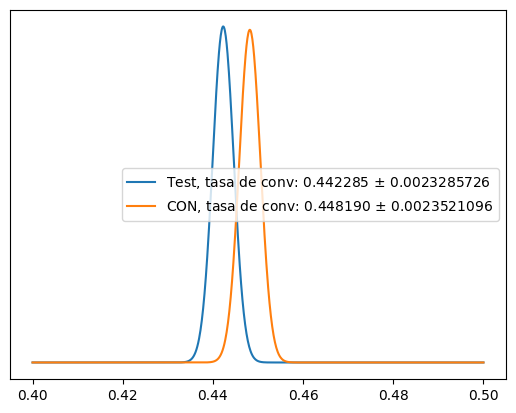

In [11]:
plot([beta_test, beta_control], ['Test', 'CON'])

In [12]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()

salto

0.013175098158249857

In [13]:
from bayes import *
prob=calc_prob(beta_control, beta_test)
prob


0.9627939748515354

In [14]:
print (
'''El test aumenta la tasa de conversion en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, prob*100)
)

El test aumenta la tasa de conversion en un 1.32%,
con una probabilidad del 96.28%


In [15]:
# test 7 días

imps_ctrl, convs_ctrl = 44700, 8502   # entrar, comprar

imps_test, convs_test = 45489, 8279


CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

CR_ctrl, CR_test

(0.19020134228187918, 0.18200004396667327)

In [16]:
a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.19021520289919913, 0.18201402475214878)

In [17]:
x=np.linspace(0.17, 0.2,1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

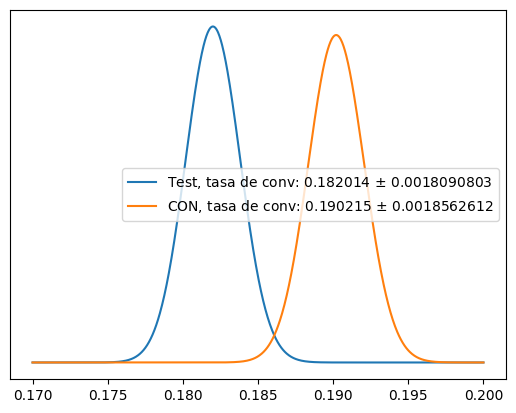

In [18]:
plot([beta_test, beta_control], ['Test', 'CON'])

In [19]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()

salto

0.04311526114658881

In [20]:
prob=calc_prob(beta_control, beta_test)
prob

0.9992226613235504

In [21]:
print (
'''El test aumenta la tasa de conversion en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, prob*100)
)

El test aumenta la tasa de conversion en un 4.31%,
con una probabilidad del 99.92%


In [21]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.
'''
Para la Retention_1 , el test aumenta la tasa de conversion en un 1.32%,
con una probabilidad del 96.28%

Para la Retention_2, el test aumenta la tasa de conversion en un 4.31%,
con una probabilidad del 99.92%

'''

AB TESTING FRECUENTISTA

In [23]:
df = df[df['sum_gamerounds'] != 0]  # quitamos a los jugadores que no han jugado ninguna partida. Son unos 3000 registros de 90000
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [33]:
df.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  False          22770
         True           19993
gate_40  False          23359
         True           20073
Name: count, dtype: int64

In [36]:
df.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  False          34277
         True            8486
gate_40  False          35166
         True            8266
Name: count, dtype: int64

In [40]:
efecto = sms.proportion_effectsize(0.448, 0.48)
efecto

-0.06417772138730715

In [41]:
n_requirido = sms.NormalIndPower().solve_power(efecto,
                                                power=0.99,
                                                alpha=0.01)
n_requirido

11669.155202639755

In [44]:
control = df[df.version == 'gate_30'].sample(n=11670, random_state=42)

tratamiento = df[df.version == 'gate_40'].sample(n=11670, random_state=42)

ab_test = pd.concat([control, tratamiento], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,2741718,gate_30,15,True,False
1,1579627,gate_30,25,False,True
2,3558203,gate_30,5,False,False
3,50850,gate_30,34,True,True
4,6476239,gate_30,38,True,True


In [45]:
ab_test.version.value_counts()

version
gate_30    11670
gate_40    11670
Name: count, dtype: int64

In [48]:
tasas_conv = ab_test.groupby('version')['retention_1']

tasas_conv = tasas_conv.agg([np.mean,
                               lambda x: np.std(x, ddof=0),
                               lambda x: stats.sem(x, ddof=0)
                               ])


tasas_conv.columns = ['conversion_rate', 'std', 'sem']

tasas_conv.style.format('{:.3f}')

C:\Users\Álvaro\AppData\Local\Temp\ipykernel_2892\217660946.py:3: FutureWarning: The provided callable <function mean at 0x000002A738551BC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tasas_conv = tasas_conv.agg([np.mean,


,conversion_rate,std,sem
version,,,
gate_30,0.464,0.499,0.005
gate_40,0.460,0.498,0.005


C:\Users\Álvaro\AppData\Local\Temp\ipykernel_2892\3348640174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ab_test['version'],


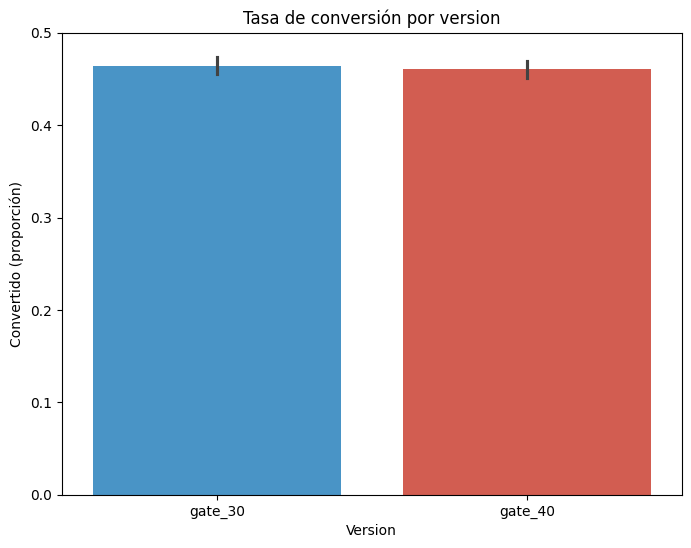

In [54]:
plt.figure(figsize=(8,6))
colores = ["#3498db", "#e74c3c"]
sns.barplot(x=ab_test['version'], 
            y=ab_test['retention_1'],
            palette=colores)

plt.ylim(0, 0.50)
plt.title('Tasa de conversión por version')
plt.xlabel('Version')
plt.ylabel('Convertido (proporción)');

In [55]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [57]:
control_res = ab_test[ab_test.version=='gate_30']['retention_1']

trat_res = ab_test[ab_test.version=='gate_40']['retention_1']

In [58]:
impresiones = [control_res.shape[0], trat_res.shape[0]]  

conversiones = [sum(control_res), sum(trat_res)]    



z_score, p_value = proportions_ztest(conversiones, nobs=impresiones)

(control_a, trata_a), (control_b, trata_b) = proportion_confint(conversiones, 
                                                                nobs=impresiones,
                                                                alpha=0.05)

In [59]:
print(f'z-score: {z_score:.2f}')

print(f'p-valor: {p_value:.3f}')

print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')

print(f'intervalo conf 95% para grupo tratamiento: [{trata_a:.3f}, {trata_b:.3f}]')

z-score: 0.64
p-valor: 0.520
intervalo conf 95% para grupo control: [0.455, 0.473]
intervalo conf 95% para grupo tratamiento: [0.451, 0.469]


In [ ]:
'''

Dado que el P-valor=0.520 es mayor que alpha = 0.05, no podemos rechazar la hipótesis nula 
H0, lo que significa que la versión de gate_40 no tiene un rendimiento significativamente diferente a la vieja versión en relación a la retención
de jugadores tras el primer día.

Los datos implican que lo más probable es que la tasa de conversión de la nueva versión sea similar a la versión de control,
y no llegaría a un porcentaje significativo. Esto probaría que el diseño no mejora nuestra tasa de conversión y que habría que volver a la mesa de diseño.

'''

In [60]:
tasas_conv = ab_test.groupby('version')['retention_7']

tasas_conv = tasas_conv.agg([np.mean,
                               lambda x: np.std(x, ddof=0),
                               lambda x: stats.sem(x, ddof=0)
                               ])


tasas_conv.columns = ['conversion_rate', 'std', 'sem']

tasas_conv.style.format('{:.3f}')

C:\Users\Álvaro\AppData\Local\Temp\ipykernel_2892\1523847509.py:3: FutureWarning: The provided callable <function mean at 0x000002A738551BC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tasas_conv = tasas_conv.agg([np.mean,


,conversion_rate,std,sem
version,,,
gate_30,0.195,0.396,0.004
gate_40,0.193,0.395,0.004


C:\Users\Álvaro\AppData\Local\Temp\ipykernel_2892\1798637507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ab_test['version'],


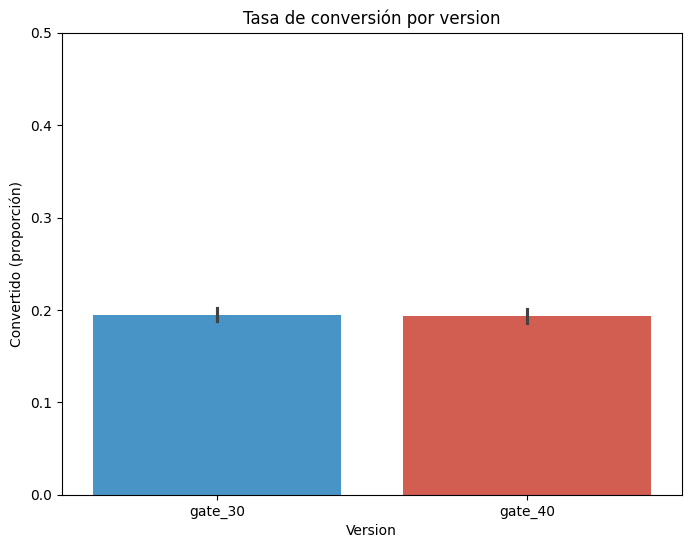

In [61]:
plt.figure(figsize=(8,6))
colores = ["#3498db", "#e74c3c"]
sns.barplot(x=ab_test['version'], 
            y=ab_test['retention_7'],
            palette=colores)

plt.ylim(0, 0.50)
plt.title('Tasa de conversión por version')
plt.xlabel('Version')
plt.ylabel('Convertido (proporción)');

In [62]:
control_res = ab_test[ab_test.version=='gate_30']['retention_7']

trat_res = ab_test[ab_test.version=='gate_40']['retention_7']

In [63]:
impresiones = [control_res.shape[0], trat_res.shape[0]]  

conversiones = [sum(control_res), sum(trat_res)]    



z_score, p_value = proportions_ztest(conversiones, nobs=impresiones)

(control_a, trata_a), (control_b, trata_b) = proportion_confint(conversiones, 
                                                                nobs=impresiones,
                                                                alpha=0.05)

In [64]:
print(f'z-score: {z_score:.2f}')

print(f'p-valor: {p_value:.3f}')

print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')

print(f'intervalo conf 95% para grupo tratamiento: [{trata_a:.3f}, {trata_b:.3f}]')

z-score: 0.28
p-valor: 0.778
intervalo conf 95% para grupo control: [0.188, 0.202]
intervalo conf 95% para grupo tratamiento: [0.186, 0.200]


In [ ]:
'''

Dado que el P-valor=0.778 es mayor que alpha =0.05, no podemos rechazar la hipótesis nula 
H0, lo que significa que la versión de gate_40 no tiene un rendimiento significativamente diferente a la vieja versión en relación a la retención
de jugadores tras las primera semana.

Los datos implican que lo más probable es que la tasa de conversión de la nueva versión sea similar a la versión de control,
y no llegaría a un porcentaje significativo. Esto probaría que el diseño no mejora nuestra tasa de conversión y que habría que volver a la mesa de diseño.

'''